Exercise 4 - Optimization with SciPy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.optimize as opt
from scipy.interpolate import interp1d


Experimental Data:
  Shape: (244, 2)
  Mean Scattering Vector: 9.60
  Std Scattering Vector: 5.15
  Mean Scattering Strength: 16.46
  Std Scattering Strength: 8.17

Model Data:
  Shape: (48, 2)
  Mean Scattering Vector: 29.53
  Std Scattering Vector: 17.59
  Mean Scattering Strength: 63158.54
  Std Scattering Strength: 67934.52


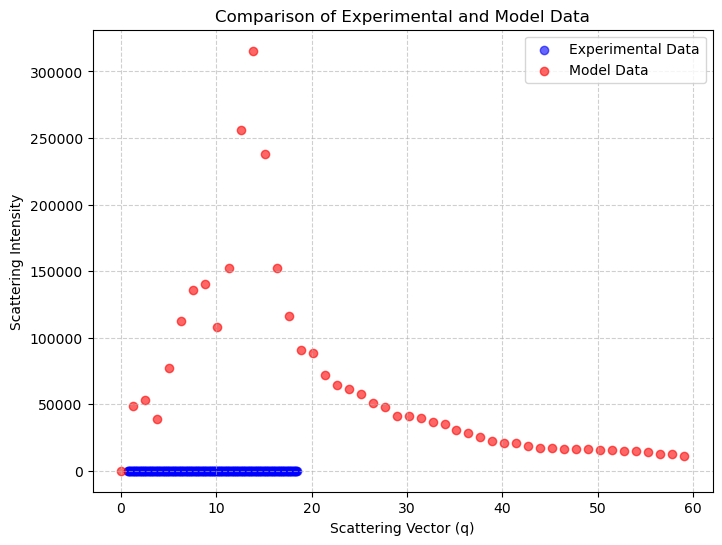

In [8]:

# Load experimental and model data
exp = np.load('I_q_IPA_exp.npy')
mod = np.load('I_q_IPA_model.npy')

# Convert to DataFrame for better handling
df_exp = pd.DataFrame(exp, columns=['q', 'Intensity'])
df_mod = pd.DataFrame(mod, columns=['q', 'Intensity'])

# Remove NaN values
df_exp.dropna(inplace=True)
df_mod.dropna(inplace=True)

# Print statistics
def print_stats(name, df):
    print(f"\n{name} Data:")
    print(f"  Shape: {df.shape}")
    print(f"  Mean Scattering Vector: {df['q'].mean():.2f}")
    print(f"  Std Scattering Vector: {df['q'].std():.2f}")
    print(f"  Mean Scattering Strength: {df['Intensity'].mean():.2f}")
    print(f"  Std Scattering Strength: {df['Intensity'].std():.2f}")

print_stats("Experimental", df_exp)
print_stats("Model", df_mod)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_exp['q'], df_exp['Intensity'], color='blue', alpha=0.6, label="Experimental Data")
plt.scatter(df_mod['q'], df_mod['Intensity'], color='red', alpha=0.6, label="Model Data")

# Formatting
plt.xlabel("Scattering Vector (q)")
plt.ylabel("Scattering Intensity")
plt.title("Comparison of Experimental and Model Data")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


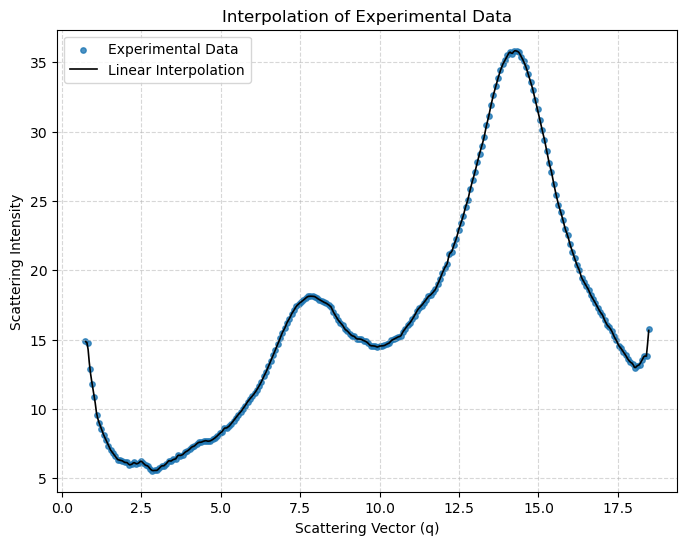

In [13]:
# Create a linear interpolation function based on experimental data
interp_func = interp1d(exp[:, 0], exp[:, 1], kind='linear', bounds_error=False, fill_value=0)

# Generate a smooth array of interpolation points
q_smooth = np.linspace(exp[:, 0].min(), exp[:, 0].max(), 500)
interp_values = interp_func(q_smooth)

# Plot the data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(exp[:, 0], exp[:, 1], alpha=0.8, s=15, label="Experimental Data")
ax.plot(q_smooth, interp_values, 'k-', linewidth=1.2, label="Linear Interpolation")

# Formatting the plot
ax.set_xlabel("Scattering Vector (q)")
ax.set_ylabel("Scattering Intensity")
ax.set_title("Interpolation of Experimental Data")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

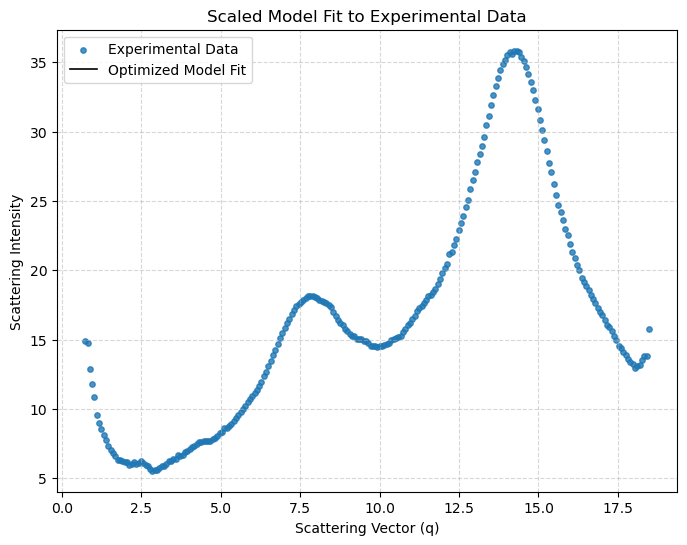

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.interpolate import interp1d

# Extract model data
q_mod, I_mod = mod[:, 0], mod[:, 1]

# Define the objective function to minimize the difference between experimental and model data
def objective(scale):
    I_mod_scaled = scale * I_mod  # Scale the model intensity
    I_mod_interp = interp_func(q_mod)  # Interpolate experimental data at model points
    return np.sum((I_mod_scaled - I_mod_interp) ** 2)  # Sum of squared differences

# Optimize the scale factor
result = minimize_scalar(objective)
best_scale = result.x

# Apply the optimal scale factor to the model
I_mod_scaled = best_scale * I_mod

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(exp[:, 0], exp[:, 1], alpha=0.8, s=15, label="Experimental Data")
ax.plot(q_mod, I_mod_scaled, 'k-', linewidth=1.2, label="Optimized Model Fit")

# Formatting the plot
ax.set_xlabel("Scattering Vector (q)")
ax.set_ylabel("Scattering Intensity")
ax.set_title("Scaled Model Fit to Experimental Data")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()
